In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('survey_results_public.csv')
schema_df = pd.read_csv('survey_results_schema.csv')

In [4]:

chosen_columns = ['Professional', 'ProgramHobby', 'University', 'EmploymentStatus',
                  'FormalEducation', 'MajorUndergrad', 'YearsProgram', 'YearsCodedJob',
                  'DeveloperType', 'CareerSatisfaction']

In [5]:
column_definitions = schema_df[schema_df['Column'].isin(chosen_columns)]


In [6]:
for ix, row in column_definitions.iterrows():
    print(row['Column'])
    print(row['Question'], '\n')

Professional
Which of the following best describes you? 

ProgramHobby
Do you program as a hobby or contribute to open source projects? 

University
Are you currently enrolled in a formal, degree-granting college or university program? 

EmploymentStatus
Which of the following best describes your current employment status? 

FormalEducation
Which of the following best describes the highest level of formal education that you've completed? 

MajorUndergrad
Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies? 

YearsProgram
How long has it been since you first learned how to program? 

YearsCodedJob
For how many years have you coded as part of your job? 

DeveloperType
Which of the following best describe you? 

CareerSatisfaction
Career satisfaction rating 



In [7]:
data = df[chosen_columns]

In [8]:

data.columns = ['professional', 'program_hobby', 'university' ,'employment_status',
                'formal_education', 'major_undergrad', 'years_program', 'years_coded_job',
                'developer_type', 'career_satisfaction']

In [9]:

data = data.dropna()
data.head(5)

,professional,program_hobby,university,employment_status,formal_education,major_undergrad,years_program,years_coded_job,developer_type,career_satisfaction
2,Professional developer,"Yes, both",No,Employed full-time,Bachelor's degree,Computer science or software engineering,20 or more years,20 or more years,Other,8.0
4,Professional developer,"Yes, I program as a hobby",No,Employed full-time,Master's degree,Computer science or software engineering,20 or more years,10 to 11 years,Mobile developer; Graphics programming; Deskto...,6.0
7,Professional developer,"Yes, both",No,Employed full-time,Master's degree,Computer science or software engineering,10 to 11 years,7 to 8 years,Web developer,7.0
8,Professional developer,"Yes, I program as a hobby","Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,13 to 14 years,7 to 8 years,Web developer; Mobile developer,6.0
9,Professional developer,"Yes, I program as a hobby","Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,13 to 14 years,8 to 9 years,Mobile developer; Desktop applications developer,6.0


In [10]:
for column in data.columns:
    print(column)
    print(data[column].unique(), '\n')

professional
['Professional developer' 'Student'
 'Professional non-developer who sometimes writes code'] 

program_hobby
['Yes, both' 'Yes, I program as a hobby' 'No'
 'Yes, I contribute to open source projects'] 

university
['No' 'Yes, part-time' 'Yes, full-time' 'I prefer not to say'] 

employment_status
['Employed full-time'
 'Independent contractor, freelancer, or self-employed'
 'Employed part-time' 'Not employed, and not looking for work'
 'I prefer not to say' 'Not employed, but looking for work' 'Retired'] 

formal_education
["Bachelor's degree" "Master's degree"
 "Some college/university study without earning a bachelor's degree"
 'Professional degree' 'Doctoral degree' 'Secondary school'
 'I prefer not to answer'] 

major_undergrad
['Computer science or software engineering'
 'Computer engineering or electrical/electronics engineering'
 'A natural science' 'A business discipline'
 'Computer programming or Web development'
 'Information technology, networking, or system admi

In [27]:

data['years_program_int'] = data['years_program'].map(lambda resp: int(resp.split(" ")[0]) if not resp == 'Less than a year' else 0)
data['years_coded_int'] = data['years_coded_job'].map(lambda resp: int(resp.split(" ")[0]) if not resp == 'Less than a year' else 0)

data['hobby'] = data['program_hobby'].map(lambda resp: resp.split(",")[0])

data['type_count'] = data['developer_type'].map(lambda resp: len(resp.split(';')))


In [28]:
len(data[data['years_coded_int'] > data['years_program_int']])

529

In [29]:

data.groupby(['hobby'])['hobby'].count()

hobby
No      6921
Yes    25545
Name: hobby, dtype: int64

In [30]:

data.groupby(['program_hobby'])['career_satisfaction'].mean()

program_hobby
No                                           7.140298
Yes, I contribute to open source projects    7.475879
Yes, I program as a hobby                    7.422363
Yes, both                                    7.619521
Name: career_satisfaction, dtype: float64

In [31]:

data.groupby(['developer_type'])['career_satisfaction'].mean()

developer_type
Data scientist                                                                                                                                                                                                                     7.380282
Data scientist; Database administrator                                                                                                                                                                                             7.000000
Data scientist; Database administrator; DevOps specialist                                                                                                                                                                          4.000000
Data scientist; Database administrator; Other                                                                                                                                                                                      7.000000
Data scientist; Database administrator; Q

In [32]:

data.groupby(['type_count'])['career_satisfaction'].agg(['count', 'mean'])


,count,mean
type_count,,
1,15213,7.360941
2,7585,7.387607
3,4895,7.484168
4,2545,7.564637
5,1180,7.559322
6,559,7.615385
7,255,7.635294
8,112,7.964286
9,58,7.948276


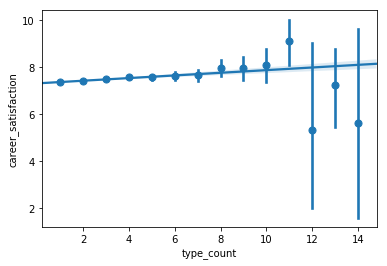

In [33]:
sns.regplot(x='type_count', y='career_satisfaction', data=data, x_estimator=pd.np.mean)

In [34]:

(
    data[data['type_count'] == 1]
    .groupby('developer_type')['career_satisfaction']
    .mean()
    .sort_values(ascending=False)
)

developer_type
Graphics programming                                     7.630435
Other                                                    7.501401
Mobile developer                                         7.483092
Data scientist                                           7.380282
Web developer                                            7.373124
Embedded applications/devices developer                  7.357724
DevOps specialist                                        7.335260
Machine learning specialist                              7.289474
Desktop applications developer                           7.149807
Developer with a statistics or mathematics background    7.144737
Quality assurance engineer                               7.142857
Database administrator                                   6.985075
Graphic designer                                         6.400000
Systems administrator                                    6.321429
Name: career_satisfaction, dtype: float64

In [35]:

(
    data
    .groupby('university')['career_satisfaction']
    .mean()
    .sort_values(ascending=False)
)

university
Yes, part-time         7.500819
No                     7.419538
Yes, full-time         7.401789
I prefer not to say    7.136240
Name: career_satisfaction, dtype: float64

In [36]:

(
    data
    .groupby('employment_status')['career_satisfaction']
    .mean()
    .sort_values(ascending=False)
)

employment_status
Independent contractor, freelancer, or self-employed    7.619898
Employed full-time                                      7.425128
Retired                                                 7.391304
Employed part-time                                      7.332724
I prefer not to say                                     7.152381
Not employed, and not looking for work                  6.782051
Not employed, but looking for work                      5.858586
Name: career_satisfaction, dtype: float64

In [37]:

(
    data
    .groupby('formal_education')['career_satisfaction']
    .mean()
    .sort_values(ascending=False)
)

formal_education
Doctoral degree                                                      7.622108
Some college/university study without earning a bachelor's degree    7.570246
Professional degree                                                  7.525424
Bachelor's degree                                                    7.395957
Master's degree                                                      7.349705
Secondary school                                                     7.000000
I prefer not to answer                                               3.000000
Name: career_satisfaction, dtype: float64

In [38]:

(
    data
    .groupby('major_undergrad')['career_satisfaction']
    .mean()
    .sort_values(ascending=False)
)

major_undergrad
A business discipline                                           7.680431
Fine arts or performing arts                                    7.639241
A social science                                                7.564039
A health science                                                7.553846
Management information systems                                  7.543290
I never declared a major                                        7.537349
Psychology                                                      7.518519
A humanities discipline                                         7.516854
A natural science                                               7.463755
Computer science or software engineering                        7.424700
A non-computer-focused engineering discipline                   7.400682
Computer programming or Web development                         7.391951
Mathematics or statistics                                       7.389800
Computer engineering or electrical/